In [44]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib 
import matplotlib.pyplot as plt

import seaborn
# import wandb

import torch
import torch.nn as nn
from torch.autograd import Variable

from sklearn.preprocessing import MinMaxScaler

from torch.utils.data import DataLoader, Dataset



In [11]:
# Read the CSV file
dataset_raw = pd.read_csv("airline-passengers.csv")
print(dataset_raw.shape)
# View the first 5 rows
dataset_raw.head()

(144, 2)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [63]:
dataset = dataset_raw.iloc[:,1:2].values
print(type(dataset_raw.iloc[:,1:2]))
print(type(dataset_raw.iloc[:,1:2].values))
print(dataset_raw.iloc[:,1:2].shape)
print(dataset_raw.iloc[:,1].shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(144, 1)
(144,)


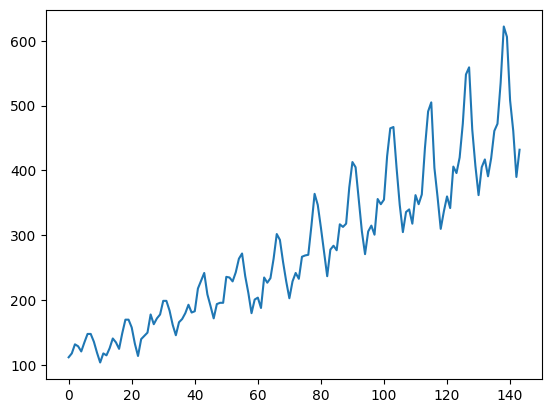

In [64]:
plt.plot(dataset)
plt.show()

In [65]:
def sliding_windows(data, obs_length):
    '''
    goal: splitting the time series into numerous observations with each length = obs_length
    data: a 1-d numpy.ndarray with dimension (len, 1)
    obs_length: the length of observation

    output: 2 numpy.ndarray, predictor and response, with sahpe = (num, obs_length, 1)
    '''
    x = []
    y = []

    for i in range(len(data) - obs_length - 1):
        _x = data[i:(i+obs_length)]
        _y = data[i+obs_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [66]:
# normalize time series
sc = MinMaxScaler()
training_data = sc.fit_transform(dataset)


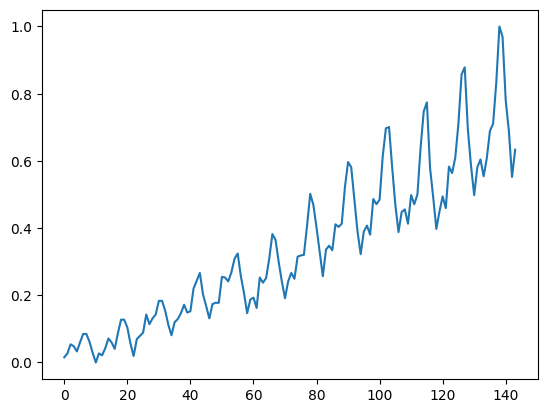

In [70]:
plt.plot(training_data)
plt.show()

In [ ]:

# split time series into several observations
obs_length = 4
x, y = sliding_windows(training_data, obs_length)

In [38]:
train_size = int(len(y) * 0.30)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(x))
dataY = Variable(torch.Tensor(y))

trainX = Variable(torch.Tensor(x[0:train_size]))
trainY = Variable(torch.Tensor(y[0:train_size]))

testX = Variable(torch.Tensor(x[train_size:len(x)]))
testY = Variable(torch.Tensor(y[train_size:len(y)]))

# 改成 .py 

In [60]:
def sliding_windows(data, obs_length):
    '''
    goal: splitting the time series into numerous observations with each length = obs_length
    data: a 1-d numpy.ndarray with dimension (len, 1)
    obs_length: the length of observation

    output: 2 numpy.ndarray, predictor and response, with sahpe = (num, obs_length, 1)
    '''
    x = []
    y = []

    for i in range(len(data) - obs_length - 1):
        _x = data[i:(i+obs_length)]
        _y = data[i+obs_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

def normalize_minmax(data):
    '''
    data: a time series
    output: normalize using MinMaxScaler from sklearn.preprocessing
    '''
    nmlz = MinMaxScaler()
    return nmlz.fit_transform(data)

def split_into_subset(X, Y, subset, train_pctg):
    train_size = int(len(Y) * train_pctg)
    test_size = len(Y) - train_size

    if subset == 'train':
        sample = Variable(torch.Tensor(X[0:train_size]))
        target = Variable(torch.Tensor(Y[0:train_size]))            
    elif subset == 'test':
        sample = Variable(torch.Tensor(X[train_size:len(X)]))
        target = Variable(torch.Tensor(Y[train_size:len(Y)]))
    else:
        sample = Variable(torch.Tensor(X))
        target = Variable(torch.Tensor(Y))

    return sample, target

In [61]:
class Pessengers(Dataset):
    def __init__(self, subset, obs_sequence, train_pctg):

        self.subset = subset
        self.obs_length = obs_length
        self.data = normalize_minmax(pd.read_csv("airline-passengers.csv").iloc[:,1:2].values)
        self.X, self.Y = sliding_windows(self.data, self.obs_length)
        self.sample, self.target = split_into_subset(self.X, self.Y, subset, train_pctg)

    def __len__(self):
        return len(self.sample)

    def __getitem__(self, index):
        return self.sample[index], self.target[index]

In [62]:
# config a dataloader
custom_dataset = Pessengers('train', 4, 0.7)
# create a dataloader
data_loader = DataLoader(custom_dataset, batch_size=1, shuffle=False)

# 遍历数据加载器示例
for i, (X,Y) in enumerate(data_loader):
    print(i)
    print("sample:", X)
    print("target:", Y)


0
sample: tensor([[[0.0154],
         [0.0270],
         [0.0541],
         [0.0483]]])
target: tensor([[0.0328]])
1
sample: tensor([[[0.0270],
         [0.0541],
         [0.0483],
         [0.0328]]])
target: tensor([[0.0598]])
2
sample: tensor([[[0.0541],
         [0.0483],
         [0.0328],
         [0.0598]]])
target: tensor([[0.0849]])
3
sample: tensor([[[0.0483],
         [0.0328],
         [0.0598],
         [0.0849]]])
target: tensor([[0.0849]])
4
sample: tensor([[[0.0328],
         [0.0598],
         [0.0849],
         [0.0849]]])
target: tensor([[0.0618]])
5
sample: tensor([[[0.0598],
         [0.0849],
         [0.0849],
         [0.0618]]])
target: tensor([[0.0290]])
6
sample: tensor([[[0.0849],
         [0.0849],
         [0.0618],
         [0.0290]]])
target: tensor([[0.]])
7
sample: tensor([[[0.0849],
         [0.0618],
         [0.0290],
         [0.0000]]])
target: tensor([[0.0270]])
8
sample: tensor([[[0.0618],
         [0.0290],
         [0.0000],
         [0.0270]